# Step 3 - Climate Analysis and Exploration

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from datetime import timedelta
import matplotlib.dates as mdates

In [2]:
import pymysql
pymysql.install_as_MySQLdb()

In [3]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
import matplotlib
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)
conn = engine.connect()

In [6]:
Base = automap_base()

In [7]:
Base.prepare(engine, reflect=True)

In [8]:
Base.classes.keys()

['measurements', 'stations']

In [9]:
stations = Base.classes.stations
measurements = Base.classes.measurements

In [10]:
session = Session(engine)

In [11]:
inspector = inspect(engine)
columns = inspector.get_columns('measurements')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs INTEGER


In [12]:
inspector = inspect(engine)
columns = inspector.get_columns('stations')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


## Precipitation Analysis

In [13]:
last_date = session.query(measurements.date).order_by(measurements.date.desc()).first()[0]
print('Last Date: ', last_date)

Last Date:  2017-08-23


In [14]:
# convert last date string to datetime object
last_date = dt.strptime(last_date, "%Y-%m-%d")
print(f"Last date: {last_date}")

Last date: 2017-08-23 00:00:00


In [15]:
first_date = dt.strptime(f"{last_date.year - 1}-{last_date.month}-{last_date.day}", "%Y-%m-%d")
print(f"First date: {first_date}")

First date: 2016-08-23 00:00:00


In [16]:
# Design a query to retrieve the last 12 months of precipitation data.
# Select only the date and prcp values.

query_data = session.query(measurements.date, measurements.prcp).\
    filter(func.strftime("%Y-%m-%d", measurements.date) >= first_date).all()
query_data

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07', 0.0),
 ('2016-10-08', 0.0),
 ('2016-10-09', 

In [17]:
print(query_data[0].date)
print(query_data[-1].date)

2016-08-24
2017-08-23


In [18]:
# these are LIST COMPREHENSIONS that gather all dates and precipitation data from the last 12 months
dates = [query_data[i].date for i in range(len(query_data))]
prcps = [query_data[i].prcp for i in range(len(query_data))]

# setup a dataframe with those dates and prcp data from the last 12 months
date_prcp_df = pd.DataFrame({"Date": dates,
                             "Precipitation": prcps})
date_prcp_df

,Date,Precipitation
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01
5,2016-08-29,0.00
6,2016-08-30,0.00
7,2016-08-31,0.13
8,2016-09-01,0.00
9,2016-09-02,0.00


In [19]:
date_prcp_df.Date = pd.to_datetime(date_prcp_df.Date)

In [20]:
date_prcp_df.set_index('Date', inplace = True)

In [21]:
date_prcp_df.head()

,Precipitation
Date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01


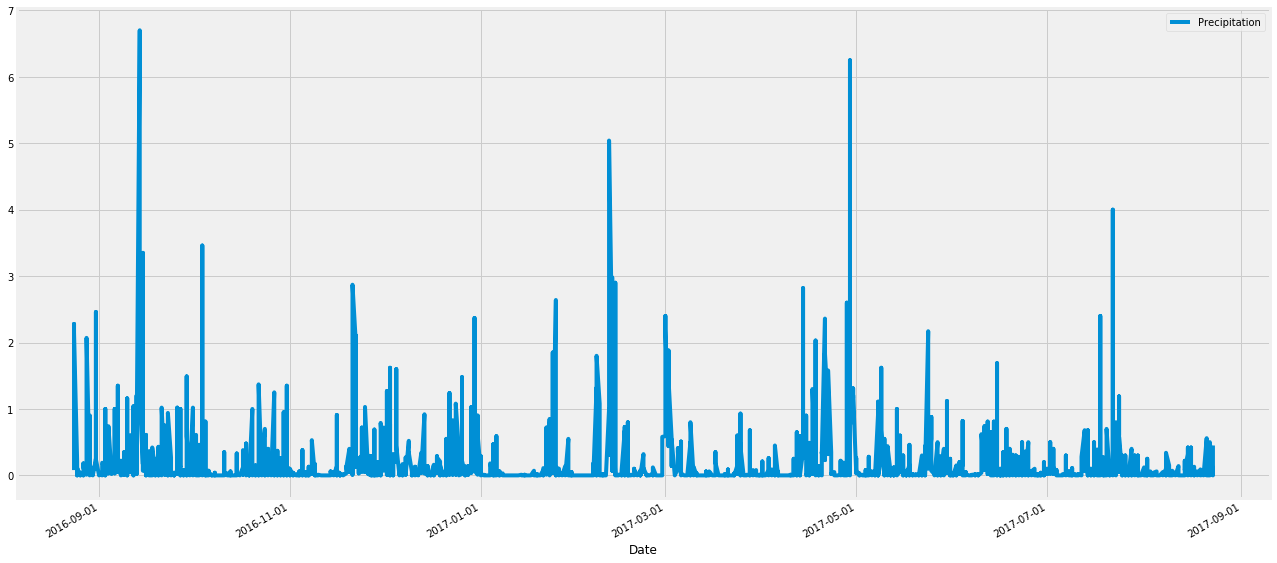

In [22]:
ax = date_prcp_df.plot(figsize = (20, 10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.show()

In [23]:
date_prcp_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Station Analysis

In [24]:
# Total stations
session.query(func.count(stations.name)).all()

[(9)]

In [57]:
# List the stations and observation counts in descending order
conn.execute('SELECT station, COUNT (tobs) \
              FROM measurements  \
              GROUP BY station \
              ORDER BY COUNT (tobs) DESC').fetchall()

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [58]:
print('Station with the highest number of observations:', conn.execute('SELECT station, COUNT(tobs) \
              FROM measurements  \
              GROUP BY station \
              ORDER BY COUNT(tobs) DESC').fetchall()[0][0])

Station with the highest number of observations: USC00519281


In [63]:
# Design a query to retrieve the last 12 months of temperature observation data (tobs).
# Filter by the station with the highest number of observations.
#func.strftime("%Y-%m-%d"
query_data_tobs = session.query(measurements.date, measurements.tobs).\
    order_by(measurements.date).\
    filter(measurements.date >= first_date).\
    filter(measurements.station == "USC00519281").all()
query_data_tobs

[('2016-08-24', 77),
 ('2016-08-25', 80),
 ('2016-08-26', 80),
 ('2016-08-27', 75),
 ('2016-08-28', 73),
 ('2016-08-29', 78),
 ('2016-08-30', 77),
 ('2016-08-31', 78),
 ('2016-09-01', 80),
 ('2016-09-02', 80),
 ('2016-09-03', 78),
 ('2016-09-04', 78),
 ('2016-09-05', 78),
 ('2016-09-06', 73),
 ('2016-09-07', 74),
 ('2016-09-08', 80),
 ('2016-09-09', 79),
 ('2016-09-10', 77),
 ('2016-09-11', 80),
 ('2016-09-12', 76),
 ('2016-09-13', 79),
 ('2016-09-14', 75),
 ('2016-09-15', 79),
 ('2016-09-16', 78),
 ('2016-09-17', 79),
 ('2016-09-18', 78),
 ('2016-09-19', 78),
 ('2016-09-20', 76),
 ('2016-09-21', 74),
 ('2016-09-22', 77),
 ('2016-09-23', 78),
 ('2016-09-24', 79),
 ('2016-09-25', 79),
 ('2016-09-26', 77),
 ('2016-09-27', 80),
 ('2016-09-28', 78),
 ('2016-09-29', 78),
 ('2016-09-30', 78),
 ('2016-10-01', 77),
 ('2016-10-02', 79),
 ('2016-10-03', 79),
 ('2016-10-04', 79),
 ('2016-10-05', 79),
 ('2016-10-06', 75),
 ('2016-10-07', 76),
 ('2016-10-08', 73),
 ('2016-10-09', 72),
 ('2016-10-10

In [65]:
tobs_data = pd.DataFrame(query_data_tobs, columns=['date', 'tobs'])
tobs_data
                         

,date,tobs
0,2016-08-24,77
1,2016-08-25,80
2,2016-08-26,80
3,2016-08-27,75
4,2016-08-28,73
5,2016-08-29,78
6,2016-08-30,77
7,2016-08-31,78
8,2016-09-01,80
9,2016-09-02,80


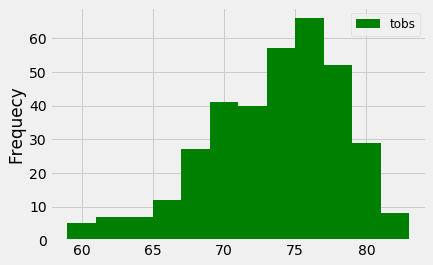

In [76]:
# Plot the results as a histogram with bins=12.
plt.style.use('fivethirtyeight')
plt.hist(tobs_data['tobs'], label='tobs', bins = 12, color = 'green')
plt.legend(loc='upper right')
lgnd = plt.legend(fontsize=12)
lgnd.legendHandles[0]._sizes = [100]
plt.ylabel('Frequecy')
plt.show()

## Temperature Analysis

In [80]:
query_temps = session.query(measurements.date, measurements.tobs) \
                             .order_by(measurements.date) \
                             .filter(measurements.date >= start_date) \
                             .filter(measurements.date <= end_date) \
                             .all()
                
start_date = '2017-08-01'
end_date = '2017-08-15'

temps_df = pd.DataFrame(query_temps, columns=["Date", "Temperature"])

temps_df

,Date,Temperature
0,2017-08-01,77
1,2017-08-01,74
2,2017-08-01,75
3,2017-08-02,73
4,2017-08-02,80
5,2017-08-02,83
6,2017-08-02,80
7,2017-08-03,79
8,2017-08-03,81
9,2017-08-03,80


In [86]:
# Write a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d 
# and return the minimum, average, and maximum temperatures for that range of dates.
# Use the calc_temps function to calculate the min, avg, and max temperatures for your trip using the matching dates
# from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")

def calc_temps(start_date, end_date):
    dic = {}
    dic['min'] = temps_df.Temperature.min()
    dic['avg'] = temps_df.Temperature.mean()
    dic['max'] = temps_df.Temperature.max()
    return(dic)

temps = calc_temps(start_date, end_date)

temps

{'avg': 79.0909090909091, 'max': 84, 'min': 70}

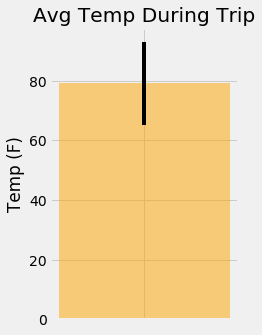

In [101]:
# Plot the min, avg, and max temperature from your previous query as a bar chart.
# Use the average temperature as the bar height. Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

plt.figure(figsize=(3,5))
plt.bar(0, height= temps['avg'], tick_label='', yerr = temps['max'] - temps['min'], color = 'orange', alpha=0.5)
plt.title('Avg Temp During Trip')
plt.ylabel('Temp (F)')
plt.show()